# **Sheth L.U.J. & Sir M.V. College Of Arts, Science & Commerce**

# **Shobit Halse | T083**

# **Pratical No. 9**

# **Aim** : Principal Component Analysis (PCA)
# • Perform PCA on a dataset to reduce dimensionality.
#• Evaluate the explained variance and select the appropriate number of principal components.
# • Visualize the data in the reduced-dimensional space.

### **Loading the Dataset**

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

df = pd.read_csv("Unemployment-Analysis.csv")

df.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


### **Feature Selection (Year Columns)**


In [2]:
year_cols = [str(y) for y in range(1991, 2021 + 1)]
X = df[year_cols].values

print("Shape of features:", X.shape)

Shape of features: (235, 31)


### **Data Standardization**

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data standardized.")

Data standardized.


In [4]:
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X_scaled)

print("Original number of features:", X.shape[1])
print("Reduced number of features (PCA):", X_pca.shape[1])

Original number of features: 31
Reduced number of features (PCA): 8


In [5]:
kpca = KernelPCA(kernel="rbf", gamma=0.01, n_components=3)
X_kpca = kpca.fit_transform(X_scaled)

print("Original number of features:", X.shape[1])
print("Reduced number of features (Kernel PCA):", X_kpca.shape[1])

Original number of features: 31
Reduced number of features (Kernel PCA): 3


In [6]:
avg_unemployment = X.mean(axis=1)
y = (avg_unemployment > avg_unemployment.mean()).astype(int)

print("Classes created.")

Classes created.


### **Creating Target Variable for LDA**

In [7]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

print("Original number of features:", X.shape[1])
print("Reduced number of features (LDA):", X_lda.shape[1])
print("Explained variance ratio:", lda.explained_variance_ratio_)

Original number of features: 31
Reduced number of features (LDA): 1
Explained variance ratio: [1.]


### **Principal Component Analysis (PCA)**
### **Linear Discriminant Analysis (LDA)**
### **Kernel PCA**

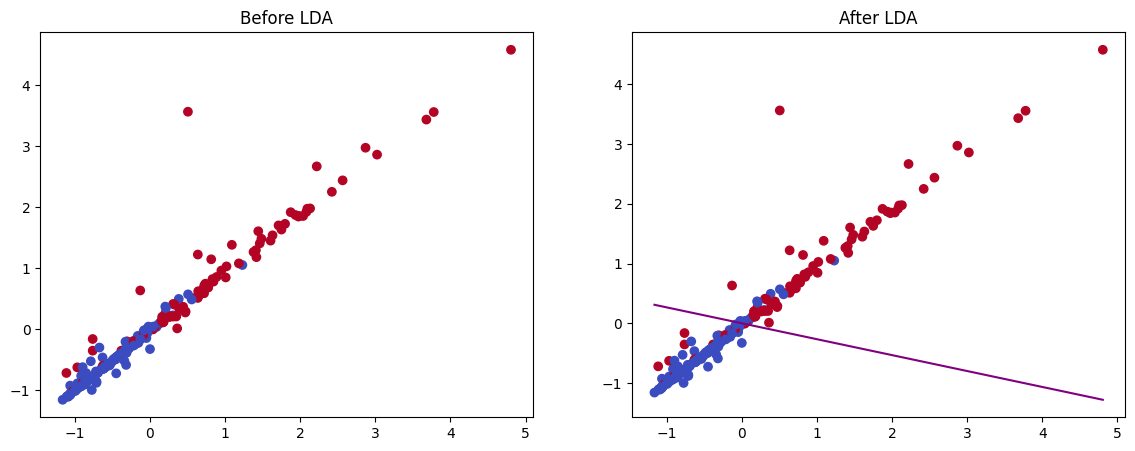

Original number of features: 31
Reduced number of features (LDA): 1
Explained variance ratio: [1.]


In [8]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

avg_unemployment = X.mean(axis=1)
y = (avg_unemployment > avg_unemployment.mean()).astype(int)

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='coolwarm')
plt.title("Before LDA")

plt.subplot(1,2,2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='coolwarm')
projected_line = lda.scalings_[:,0]
line = np.linspace(X_scaled[:,0].min(), X_scaled[:,0].max(), 100)
plt.plot(line, projected_line[1]/projected_line[0] * line, color='purple')
plt.title("After LDA")

plt.show()

print("Original number of features:", X.shape[1])
print("Reduced number of features (LDA):", X_lda.shape[1])
print("Explained variance ratio:", lda.explained_variance_ratio_)